# Introduction

The purpose of this notebook is to serve as an exploratory data analysis (EDA) of the Tecator data set. These data, for the purposes of this project, consist of 215 samples of finely-chopped pure meat with different moisture, fat, and protein contents. The functional inputs are $X_{i}(t)$ and the scalar outputs are $y_{i}$. Each $X_{i}(t)$ consists of 100 observations of wavelength absorbances from 850 nm to 1050 nm, while each $y_{i}(t)$ consists of percent fat content. Please see [the data set reference](https://lib.stat.cmu.edu/datasets/tecator) for more info.

## Imports

In [1]:
import json

import matplotlib.pyplot as plt
import pandas as pd

from tecatorfda.data import generate_tecator_fat

# Fetch and save the data

In [2]:
generate_tecator_fat()

## Load the data

In [3]:
tecator_df = pd.read_csv("../data/tecator.csv")
fat_df = pd.read_csv("../data/fat.csv")

with open("../data/metadata.json", "r") as f:
    metadata = json.load(f)
wavelength_grid = metadata["wavelengths"]
wavelength_unit = metadata["wavelength_unit"]

tecator_df

,850.0,852.0202,854.0404,856.0606,858.0808,860.101,862.1212,864.1414,866.1616,868.1818,...,1031.8182,1033.8384,1035.8586,1037.8788,1039.899,1041.9192,1043.9394,1045.9596,1047.9798,1050.0
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,3.00247,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.30473,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.70934,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.99820,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.32201,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,3.14626,3.15166,3.15703,3.16244,3.16791,3.17348,3.17923,3.18521,3.19140,3.19792,...,3.63298,3.61483,3.59695,3.57915,3.56142,3.54365,3.52563,3.50705,3.48765,3.46769
211,2.57992,2.58040,2.58099,2.58175,2.58266,2.58381,2.58530,2.58719,2.58949,2.59225,...,2.97211,2.95464,2.93756,2.92062,2.90367,2.88668,2.86951,2.85180,2.83347,2.81473
212,2.56875,2.56923,2.56985,2.57060,2.57150,2.57268,2.57420,2.57610,2.57841,2.58129,...,2.96551,2.94870,2.93226,2.91592,2.89952,2.88291,2.86595,2.84836,2.82998,2.81111
213,2.65884,2.65943,2.66023,2.66108,2.66215,2.66360,2.66550,2.66787,2.67070,2.67405,...,3.06390,3.04851,3.03351,3.01851,3.00327,2.98759,2.97121,2.95374,2.93514,2.91564


## Visualize the first 5 wavelength spectra

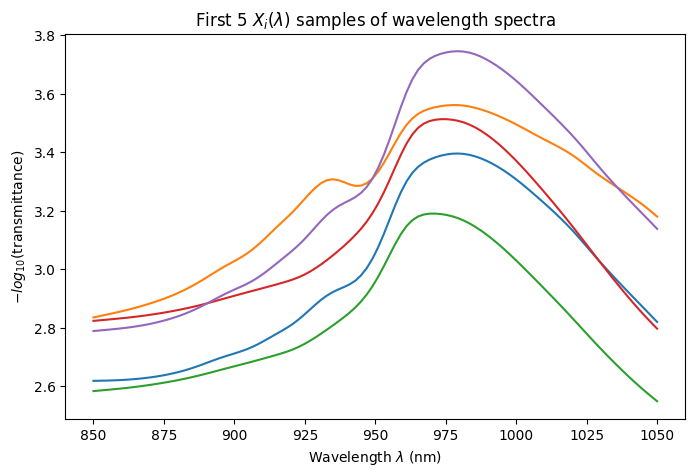

In [18]:
plt.figure(figsize=(8,5))
for i in range(5):
    plt.plot(wavelength_grid, tecator_df.iloc[i])
    plt.title("First 5 $X_{i}(\lambda)$ samples of wavelength spectra")
    plt.xlabel(f"Wavelength $\lambda$ ({wavelength_unit})")
    plt.ylabel(r"$-log_{10}(\text{transmittance})$")